In [2]:
import pandas as pd
import numpy as np

In [3]:
passenger_df = pd.read_csv("D:\Download\Visualisasi Informasi\Self Learning\Interactive-Data-Visualization-with-Python\datasets\chap5_data\AirPassengersDates.csv")
passenger_df["Date"] = pd.to_datetime(passenger_df["Date"]) 
passenger_df.head()

,Date,#Passengers
0,1949-01-12,112
1,1949-02-24,118
2,1949-03-22,132
3,1949-04-05,129
4,1949-05-24,121


In [4]:
passenger_df["Date"] = pd.to_datetime(passenger_df["Date"])

In [5]:
passenger_df['mean'] = passenger_df["#Passengers"].mean()
passenger_df['std'] = passenger_df["#Passengers"].std()

In [8]:
passenger_df['zscore'] = (passenger_df["#Passengers"] - passenger_df['mean'])/passenger_df['std']

In [9]:
passenger_df['zscore_abs'] = abs(passenger_df['zscore'])

In [10]:
passenger_df.sort_values(by="zscore_abs", ascending=False).head(100)

,Date,#Passengers,mean,std,zscore,zscore_abs
138,1960-07-02,622,280.298611,119.966317,2.848311,2.848311
139,1960-08-16,606,280.298611,119.966317,2.714940,2.714940
127,1959-08-01,559,280.298611,119.966317,2.323164,2.323164
126,1959-07-29,548,280.298611,119.966317,2.231471,2.231471
137,1960-06-02,535,280.298611,119.966317,2.123108,2.123108
...,...,...,...,...,...,...
111,1958-04-02,348,280.298611,119.966317,0.564337,0.564337
105,1957-10-27,347,280.298611,119.966317,0.556001,0.556001
79,1955-08-13,347,280.298611,119.966317,0.556001,0.556001
41,1952-06-21,218,280.298611,119.966317,-0.519301,0.519301


In [15]:
anamlous_df_high = passenger_df.sort_values(by="zscore", 
ascending=False).head(10)
anamlous_df_high["Date"] = pd.to_datetime(anamlous_df_high["Date"])
anamlous_df_low = passenger_df.sort_values(by="zscore", 
ascending=True).head(10)
anamlous_df_low["Date"] = pd.to_datetime(anamlous_df_low["Date"])

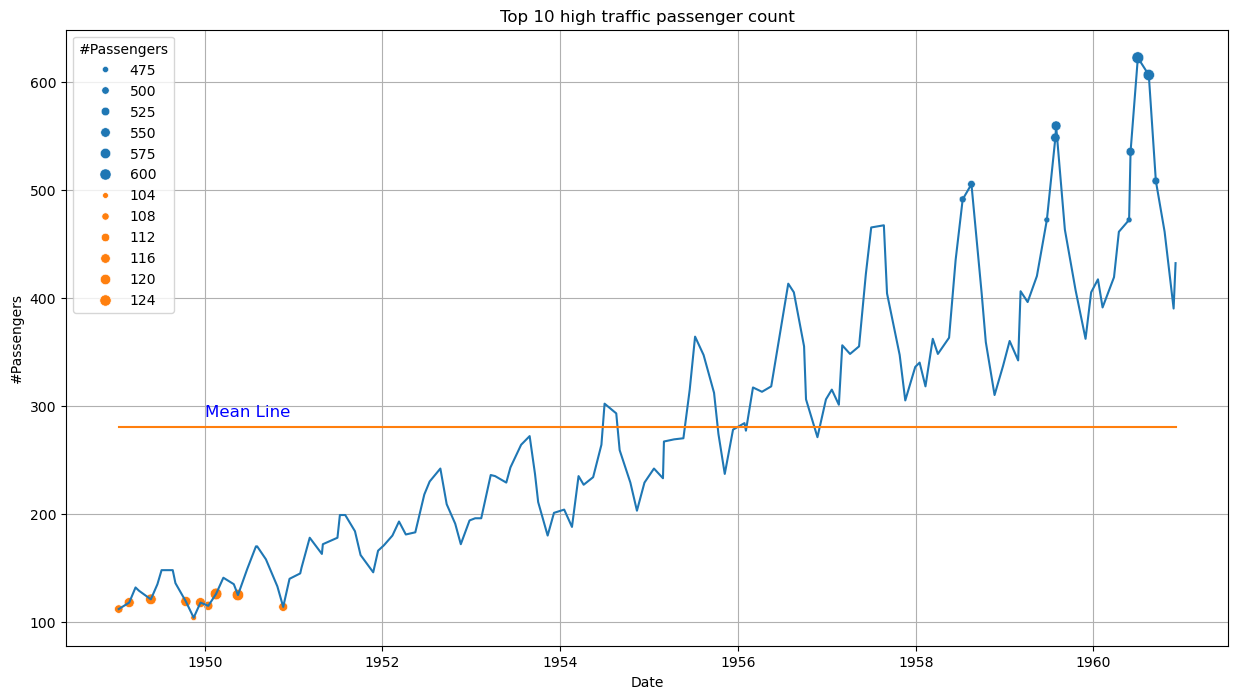

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.grid=True
plt.title("Top 10 high traffic passenger count")
ax = sns.lineplot(x="Date", y="#Passengers", data=passenger_df)
ax = sns.scatterplot(x="Date",y="#Passengers", data=anamlous_df_high, size="#Passengers")
ax = sns.lineplot(x="Date", y="mean", data=passenger_df)
ax.text(pd.to_datetime("1950"), 290, "Mean Line", 
horizontalalignment='left', size='large', color='Blue')
ax = sns.scatterplot(x="Date",y="#Passengers", data=anamlous_df_low, size="#Passengers")
ax.grid()
